# We will explore the data and ask questions to get more interesting insights from the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [37]:
data['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [38]:
data['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [39]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [3]:
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data['salary'].fillna(0,inplace = True)

In [6]:
def plot(data,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

# Who is getting more placements girls or boys?

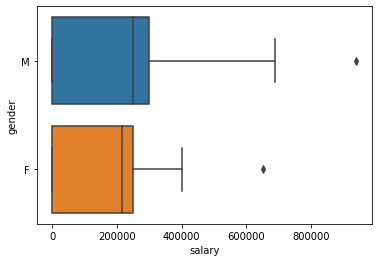

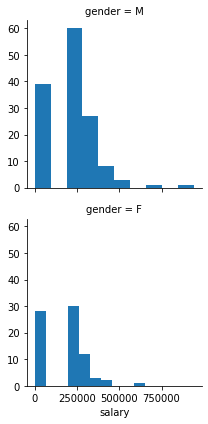

In [34]:
plot(data,"salary","gender")

From the above plot I can infer the following details:
<ol>
    <li>The Range of salary is high for boys with the median of 2.5 Lakhs per annum</li>
    <li>The highest package is offered to a boy which is nearly 10 Lakhs per annum</li>
    <li>The highest package offered for girls is 7 Lakhs per annum</li>
    
</ol>

The Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50,total number girls not placed are 30 and total number of boys not placed are 40 that can be seen from the plot given below:


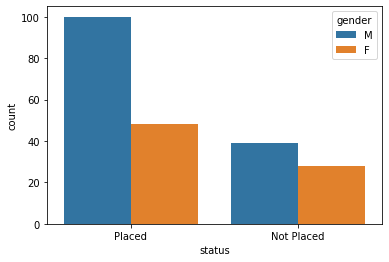

In [8]:
sns.countplot(data['status'],hue=data['gender'])

# To get placed in a company with high package which board should I choose (Central or State board) in 10th?

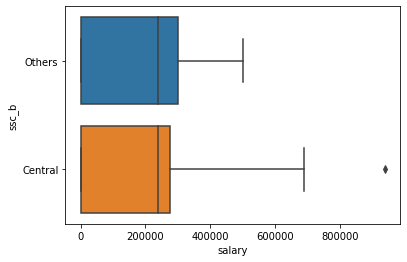

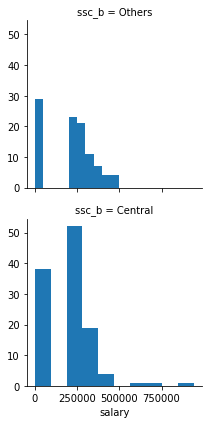

In [9]:
plot(data,"salary","ssc_b")

From the above plot I can infer the following details:
<ol>
    <li>The Range of salary is high for central board students</li>
    <li>The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy</li>
    <li>The highest package offered for other board students is 5 Lakhs per annum</li>

</ol>


Better to choose central board but the ratio is 80:70 which infers thats both the board students are getting placed and ratio of student not getting placed is  35:25 here central board students are more, so the 10th board selection doesn't matters but if you want high package go for central board...(See the plot given below)

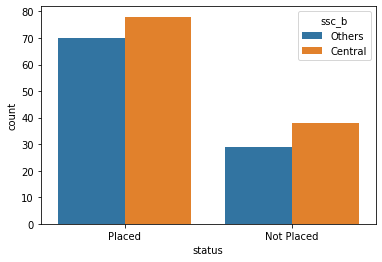

In [10]:
sns.countplot(data['status'],hue=data['ssc_b'])

# To get placed in a company with high package which board should I choose (Central or State board) in 12th?

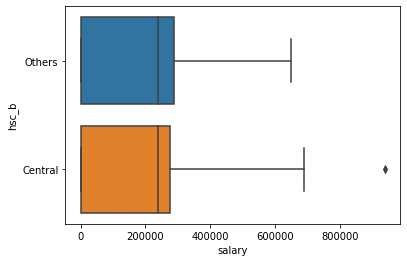

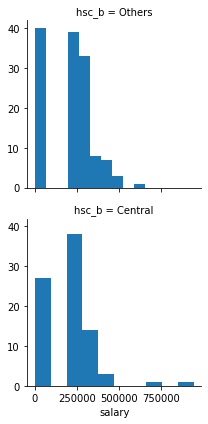

In [11]:
plot(data,"salary","hsc_b")

From the above plot I can infer the following details:
<ol>
<li>The Range of salary is high for central board students with the median of 2.5 Lakhs per annum</li>
<li>The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy and also his 10th board is central board</li>
    <li>The highest package offered for other board students is 7 Lakhs per annum</li>


Total number central board students not placed are 25 and Total number of other board student not placed are 40
Better to choose other board and ratio is 90:50 which infers thats the other board students are getting more placed and ratio of student not getting placed is 40:25 here central board students are less which infers that most of them will get offers.If you want high package go for central board...(See the plot given below)

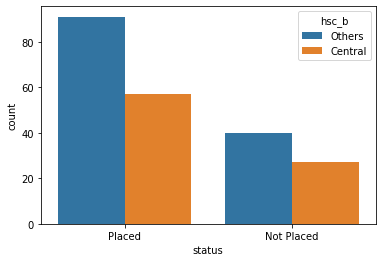

In [12]:
sns.countplot(data['status'],hue=data['hsc_b'])

<h1>Plotting the Relationships between numerical columns </h1>

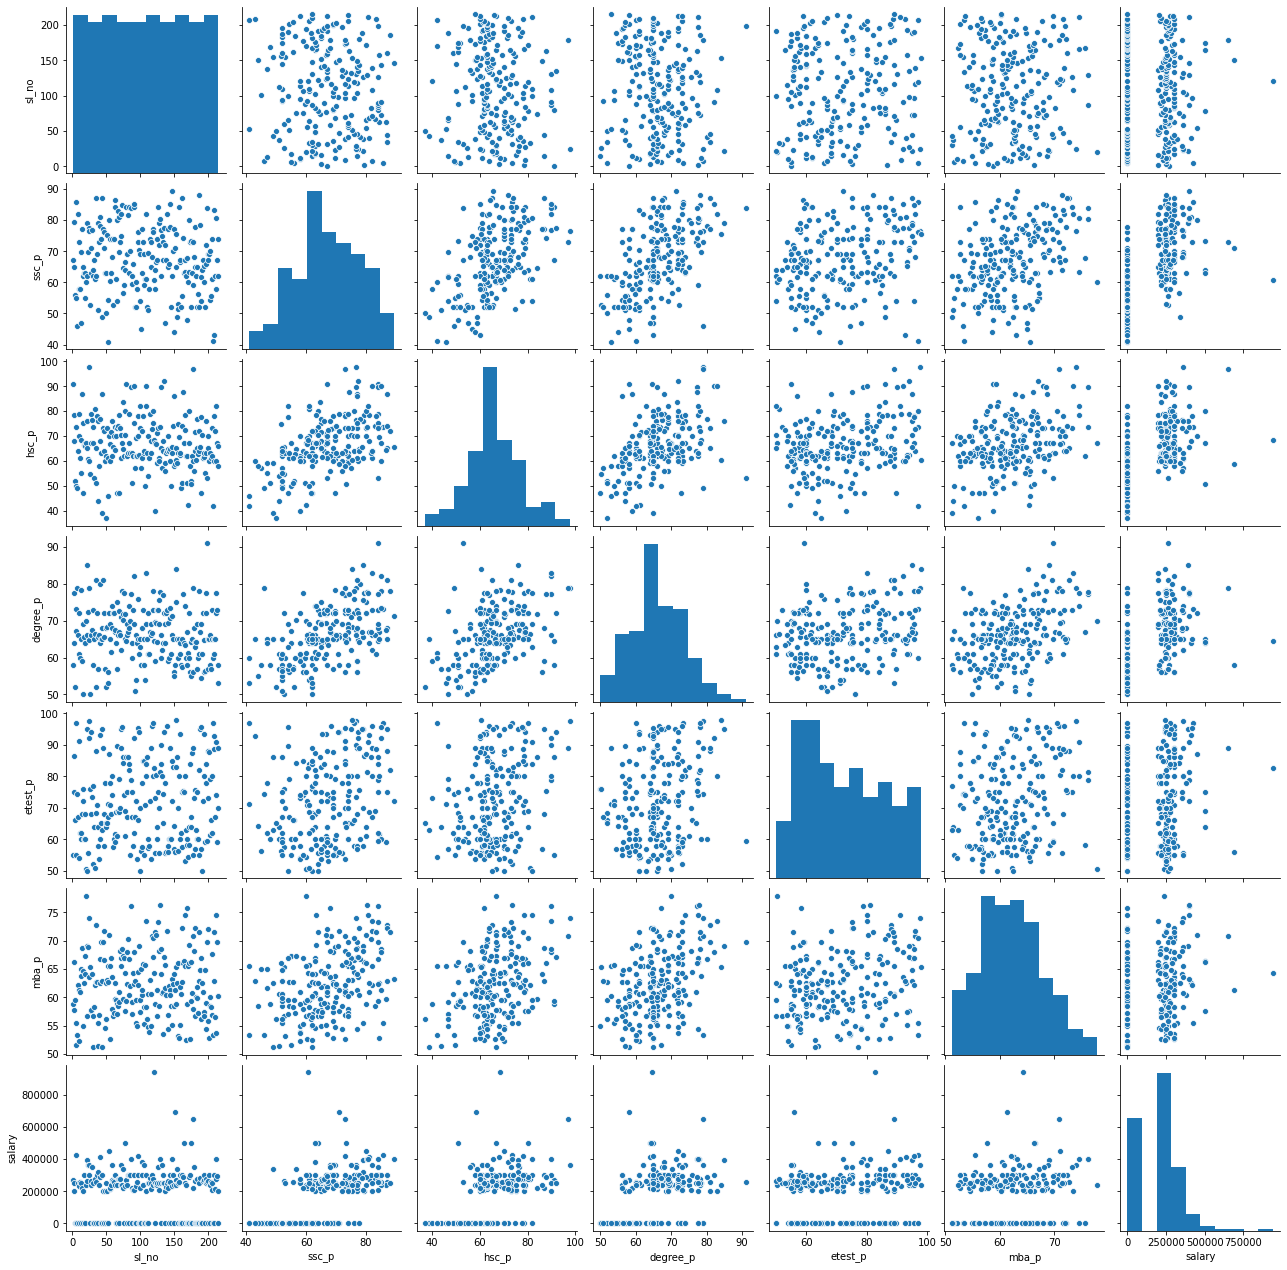

In [16]:
sns.pairplot(data)

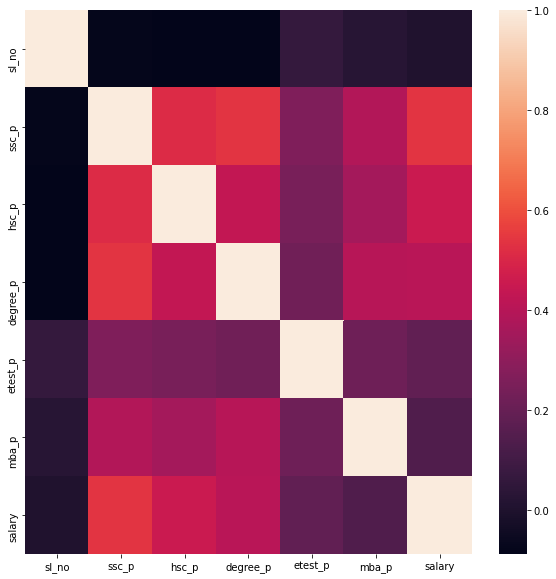

In [17]:
plt.figure(figsize =(10,10))
sns.heatmap(data.corr())

Highly correlated columns are:
{'salary', 'ssc_p', 'degree_p', 'hsc_p'}


# Who is mostly not getting placed?

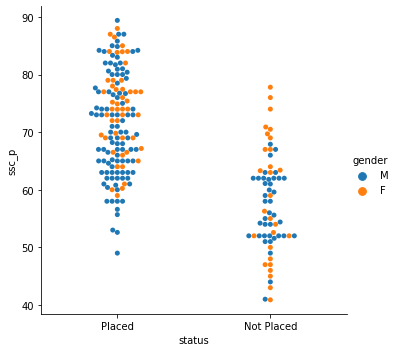

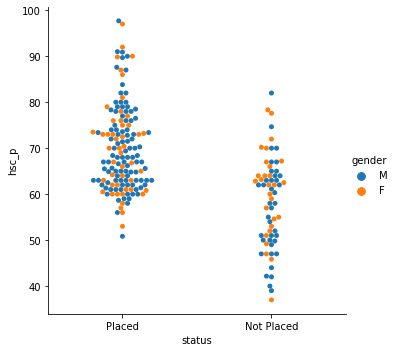

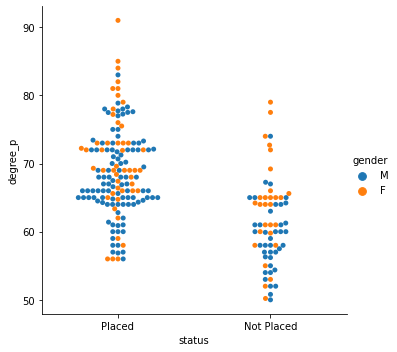

In [19]:
sns.catplot(x="status", y="ssc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=data,kind="swarm",hue='gender')

The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed because they don't even have basic eligibility(more than 60 percent in 10th,12th and degree)

# Which stream students are getting more placed and which stream students are mostly not placed?

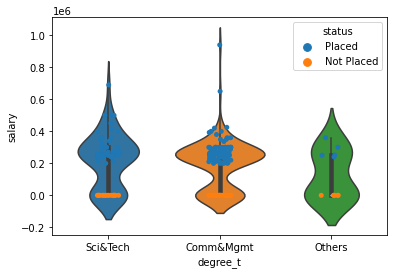

In [20]:
sns.violinplot(x="degree_t", y="salary", data=data)
sns.stripplot(x="degree_t", y="salary", data=data,hue='status')

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements due to less number of students...

# **End of exploratory data analysis you can find Machine Learning models in the same folder** 